### You will work with the attached CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_, and your specific tasks are:

### 0. import essential modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. (15%) Import rainfall data CSV file

#### 1.1 (6%) Import CSV data file as pandas dataframe

#### 1.2 (6%) Make column 'date' from str to datetime format

#### 1.3 (3%) Display the first 10 rows of the dataframe

In [2]:
# read csv file as a pandas dataframe
path='./Data/Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv'
df = pd.read_csv(path)

# Convert column 'date' from 'str' to 'datetime' data type
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Display the first 10 rows of the dataframe
print(df.head(10))

               1_9943     1_9944    1_10131    1_10132    1_10133    1_10134  \
date                                                                           
1981-01-01   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1981-01-02   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1981-01-03   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1981-01-04   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1981-01-05   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1981-01-06   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1981-01-07   7.893805   7.814187   8.006248   7.927935   7.848259   7.790540   
1981-01-08   3.867821   3.828809   3.973233   3.934514   3.895154   3.866643   
1981-01-09  16.722214  16.553547  16.959726  16.793835  16.625055  16.502789   
1981-01-10   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

              1_10317    1_10318    1_1

### 2. (30%) Annual rainfall calculation

#### 2.1 (15% + 5%) Calculate annual rainfall totals for each year and export to a CSV file named _Rain_MD-Androy-Bekily_1Y_1981-2021_CHIRPS.csv_.
* Note for the CSV file: the name of the first column is 'Year' and the content should include _year_ only (without month and day) and the format is 4-digit year ('yyyy').
* Note for the CSV file: the precision of data in the CSV is to 3 decimal places.


#### 2.2 (10%) Make a line plot illustrating the annual rainfall for location "1_10317" and export it to a PNG file named _Rain_MD-Androy-Bekily_1Y_1981-2021_CHIRPS.png_
* Note for the plot: The size of the plot is 6-inch width and 4-inch height.
* Note for the plot: The x-axis is for time (in year) and the y-axis for rainfall totals (in mm), respectively. There shall be plot title ('annual rainfall'), legend ('1_10317') and text labels for x-axis ('time (year)') and y-axis ('rainfall depth (mm)') for the plot.

In [3]:
# Use reample to calculate rainfall totals for each year
annual_rainfall = df.resample('Y').sum()

# Export to a CSV file
annual_rainfall.index = pd.to_datetime(annual_rainfall.index).year
annual_rainfall = annual_rainfall.rename_axis('Year')
annual_rainfall = annual_rainfall.round(3)
print(annual_rainfall)
annual_rainfall.to_csv('Rain_MD-Androy-Bekily_1Y_1981-2021_CHIRPS.csv')

       1_9943   1_9944  1_10131  1_10132  1_10133  1_10134  1_10317  1_10318  \
Year                                                                           
1981  578.500  578.291  578.966  578.934  578.892  579.744  577.103  578.213   
1982  627.711  627.097  635.206  634.284  633.124  631.496  651.551  648.386   
1983  413.940  415.296  411.418  413.002  414.944  416.805  408.249  408.517   
1984  539.791  539.810  539.757  540.357  540.498  539.893  544.558  542.206   
1985  556.842  555.816  557.855  556.696  555.362  553.604  565.512  562.610   
1986  546.829  547.799  541.445  542.806  544.315  545.563  537.579  536.768   
1987  616.042  611.355  618.621  614.054  609.517  605.206  625.498  623.440   
1988  496.617  504.313  486.032  492.595  499.843  506.908  474.308  476.183   
1989  765.059  760.923  775.903  772.173  768.099  763.518  795.262  791.107   
1990  615.620  617.634  614.902  616.616  618.635  620.358  612.872  614.031   
1991  416.387  412.032  424.449  420.432

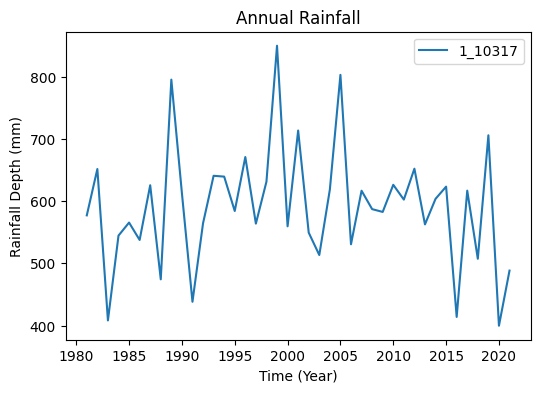

In [4]:
# Make a line plot for the annual totals and export
rain_10317 = annual_rainfall.loc[:, ['1_10317']]
plt.figure(figsize=(6, 4))
plt.plot(rain_10317.index, rain_10317['1_10317'], label='1_10317')
plt.title('Annual Rainfall')
plt.legend()
plt.xlabel('Time (Year)')
plt.ylabel('Rainfall Depth (mm)')
plt.savefig('Rain_MD-Androy-Bekily_1Y_1981-2021_CHIRPS.png')
plt.show()

### 3. (20%) Maximum 1-day rainfall calculation

#### 3.1 (15%) Calculate maximum 1-day rainfall for each month


#### 3.2 (5%) Export to a CSV file named _Rain_MD-Androy-Bekily_1d-Max-1M_198101-202112_CHIRPS.csv_
* Note for the CSV file: the name of the first column is 'Year-Month' and the content should include _year_ and _month_ only (without day), and the format is 'yyyy-mm'
* Note for the CSV file: the precision of data in the CSV is to 3 decimal places.

In [5]:
# Use reample to calculate 1-day rainfall maxima for each month
monthly_max_rainfall = df.resample('M').max()

# Export to a CSV file
monthly_max_rainfall.index = pd.to_datetime(monthly_max_rainfall.index).strftime('%Y-%m')
monthly_max_rainfall = monthly_max_rainfall.rename_axis('Year-Month')
monthly_max_rainfall = monthly_max_rainfall.round(3)
print(monthly_max_rainfall)
monthly_max_rainfall.to_csv('Rain_MD-Androy-Bekily_1d-Max-1M_198101-202112_CHIRPS.csv')

            1_9943  1_9944  1_10131  1_10132  1_10133  1_10134  1_10317  \
Year-Month                                                                
1981-01     35.127  34.560   35.912   35.347   34.777   34.192   37.362   
1981-02     28.361  28.462   28.351   28.456   28.556   28.789   27.912   
1981-03     10.270  10.277   10.125   10.135   10.142   10.168    9.919   
1981-04      5.176   5.294    5.184    5.220    5.287    5.394    5.921   
1981-05     13.816  13.799   12.522   12.581   12.570   12.689   10.548   
...            ...     ...      ...      ...      ...      ...      ...   
2021-08      3.672   3.729    3.515    3.573    3.630    3.669    3.350   
2021-09      4.875   4.980    4.647    4.710    5.002    5.658    4.350   
2021-10      4.610   4.489    5.561    5.508    5.297    4.775    7.636   
2021-11     20.752  20.464   21.267   21.016   20.761   20.412   21.889   
2021-12     30.600  30.182   30.344   29.949   29.516   29.082   30.619   

            1_10318  1_1

### 4. (35%) Maximum N-day rainfall calculation for a given month

#### 4.1 (30%) Calculate maximum 3 calendar-day rainfall for calendar month November for each year

#### 4.2 (5%) Export to a CSV file named _Rain_MD-Androy-Bekily_3d-Max-Nov_1981-2021_CHIRPS.csv_
* Note for the CSV file: the name of the first column is 'Year' and the content should include _year_ only (without month and day) and the format is 4-digit year ('yyyy').
* Note for the CSV file: the precision of data in the CSV is to 3 decimal places.

In [6]:
# Use resample to calculate 3-day rainfall sum
three_day_rainfall = df.resample('3D').sum()

# Use resample to obtain maximum 3-day rainfall for each calendar month
three_day_max_rainfall = three_day_rainfall.resample('M').max()

# Apply filter to get November records only
november_rainfall = three_day_max_rainfall[three_day_max_rainfall.index.month == 11]

# Export to a CSV file
november_rainfall.index = pd.to_datetime(november_rainfall.index).year
november_rainfall = november_rainfall.rename_axis('Year')
november_rainfall = november_rainfall.round(3)
print(november_rainfall)
november_rainfall.to_csv('Rain_MD-Androy-Bekily_3d-Max-Nov_1981-2021_CHIRPS.csv')

      1_9943  1_9944  1_10131  1_10132  1_10133  1_10134  1_10317  1_10318  \
Year                                                                         
1981  18.794  18.743   18.556   18.509   18.467   18.533   19.826   19.186   
1982  10.615  10.172   11.546   11.120   10.694   10.281   13.646   13.096   
1983  20.805  20.682   20.996   20.930   20.841   20.716   21.572   21.437   
1984  16.226  16.032   16.219   16.033   15.919   15.897   15.602   15.783   
1985  21.592  21.384   21.973   21.920   21.670   21.233   23.285   22.790   
1986  29.547  29.498   29.119   29.104   29.089   29.060   29.052   28.884   
1987  25.336  25.533   24.741   24.438   24.660   24.850   26.025   25.816   
1988  53.508  53.982   50.420   51.044   51.585   52.021   42.945   44.806   
1989  24.192  24.299   23.252   23.372   23.589   23.846   23.509   23.136   
1990  33.335  33.300   32.875   32.952   32.944   32.811   32.033   32.144   
1991  13.591  14.014   12.941   13.302   13.664   14.027   11.83

### For your reference, CHIRPS (Climate Hazards Group InfraRed Precipitation with Station data) is a satellite-based precipitation product. It has provided quasi-global rainfall estimate for over 35 years. You can find more information about CHRIPS via this link: https://www.nature.com/articles/sdata201566

### The CSV data file you work with here was clipped over a town called Bekily in the region of Androy Province, Madagascar. Farmers from Bekily are one of the poorest in the world, having no resources to build irrigation system, thus suffering a lot from the drought ( a consequence of climate change, impacting many regions in the world).